In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,precision_score,classification_report,f1_score,roc_auc_score

df=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(df.columns)
# df.describe()
df.isnull().sum().sort_values(ascending=False)
print(test.shape) 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(418, 11)


In [109]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].median())
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Age']=test['Age'].fillna(test['Age'].median())


In [110]:
for col in ['Sex','Embarked']:
    df[col]=LabelEncoder().fit_transform(df[col])
df['Ticket'] = df['Ticket'].astype('category').cat.codes
df['Cabin'] = df['Cabin'].fillna('Unknown')  
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])  
df.drop(columns='Name',inplace=True)
for col in ['Sex','Embarked']:
    test[col]=LabelEncoder().fit_transform(test[col])
test['Ticket'] = test['Ticket'].astype('category').cat.codes
test['Cabin'] = test['Cabin'].fillna('Unknown')  
test['Cabin'] = LabelEncoder().fit_transform(test['Cabin'])  
test.drop(columns='Name',inplace=True)

In [111]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch      Ticket        Fare       Cabin    Embarked  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594  338.528620   32.204208  130.744108    1.536476  
std      1.102743    0.806057  200.850657   49.693429   36.024237    0.791503  
min      0.000000    0.000000    0.000000    0.00

In [112]:
df[['Age','Fare']]=StandardScaler().fit_transform(df[['Age','Fare']])
print(df[['Age','Fare']].head())
test[['Age','Fare']]=StandardScaler().fit_transform(test[['Age','Fare']])

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


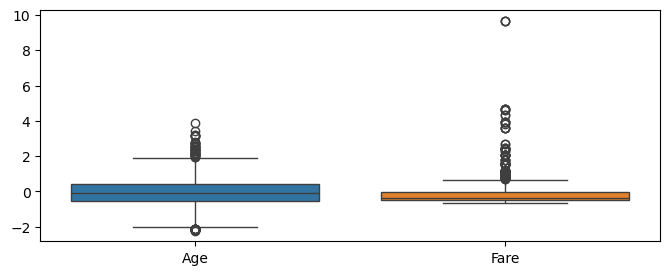

In [113]:
plt.figure(figsize=(8,3))
sns.boxplot(df[['Age','Fare']])
plt.show()

In [114]:
Q1=df[['Age','Fare']].quantile(0.25)
Q3=df[['Age','Fare']].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[((df[['Age','Fare']]>lower) | (df[['Age','Fare']]<upper)).all(axis=1)]
print(df[['Age','Fare']].describe())
Q1=df[['Age','Fare']].quantile(0.25)
Q3=df[['Age','Fare']].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
for col in ['Age', 'Fare']:
    test[col] = np.clip(test[col], lower[col], upper[col])
print(test[['Age','Fare']].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00
              Age        Fare
count  418.000000  417.000000
mean    -0.023800   -0.181899
std      0.921915    0.409186
min     -2.064308   -0.638017
25%     -0.520097   -0.496618
50%     -0.204852   -0.379169
75%      0.484745   -0.073910
max      1.931883    0.673106


In [115]:
print(df.corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Ticket         -0.056554 -0.164549  0.319869  0.059372 -0.070382  0.079461   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   
Cabin          -0.035077 -0.254888  0.684121  0.096681 -0.240839  0.043593   
Embarked        0.013128 -0.167675  0.162098  0.108262 -0.018754  0.068230   

                Parch    Ticket      Fare     Cabin  Embarked  

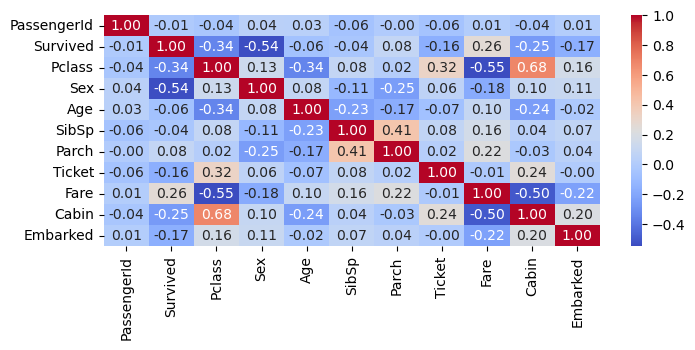

In [116]:
plt.figure(figsize=(8,3))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [117]:
print(df.head())


   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch  Ticket  \
0            1         0       3    1 -0.565736      1      0     523   
1            2         1       1    0  0.663861      1      0     596   
2            3         1       3    0 -0.258337      0      0     669   
3            4         1       1    0  0.433312      1      0      49   
4            5         0       3    1  0.433312      0      0     472   

       Fare  Cabin  Embarked  
0 -0.502445    147         2  
1  0.786845     81         0  
2 -0.488854    147         2  
3  0.420730     55         2  
4 -0.486337    147         2  


In [118]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [119]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X,y)
pred=model.predict(test)
print(pred)


[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1]


In [120]:
score=cross_val_score(model,X,y,cv=5)
print("Cross-validation scores:", score)
print("Mean CV Score:", score.mean())


Cross-validation scores: [0.79329609 0.79775281 0.86516854 0.83146067 0.86516854]
Mean CV Score: 0.8305693302366455


In [ ]:
print(test.shape) 
print(len(pred))    


(418, 10)
418


In [122]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred
})
submission.to_csv('submission.csv', index=False)